# Heart disease prediction

### Importing dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### Importing file

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### Analysis of the dataset

In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
df['age'].max()

77

In [12]:
df['age'].min()

29

In [13]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [14]:
countTdkSakit = len(df[df.target == 0])
countSakit = len(df[df.target == 1])
print("Percentage of patients who are not sick: {:.2f}%".format((countTdkSakit / (len(df.target))*100)))
print("Percentage of patients who are sick: {:.2f}%".format((countSakit / (len(df.target))*100)))

Percentage of patients who are not sick: 45.54%
Percentage of patients who are sick: 54.46%


In [15]:
countW = len(df[df.sex == 0])
countM = len(df[df.sex == 1])
print("Female percentage: {:.2f}%".format((countW / (len(df.sex))*100)))
print("Male percentage: {:.2f}%".format((countM / (len(df.sex))*100)))

Female percentage: 31.68%
Male percentage: 68.32%


### Interpretation

This dataset contains 303 entries with 14 features. There are people from both th sex, 207 are male and 96 of them are female. No null values is there in the dataset. A total of 165 has heart disease while 138 of them does not. People from different age catergoreies is also present. The minimum age of a person is 29 and the oldest person is of age 77.

### Visualization

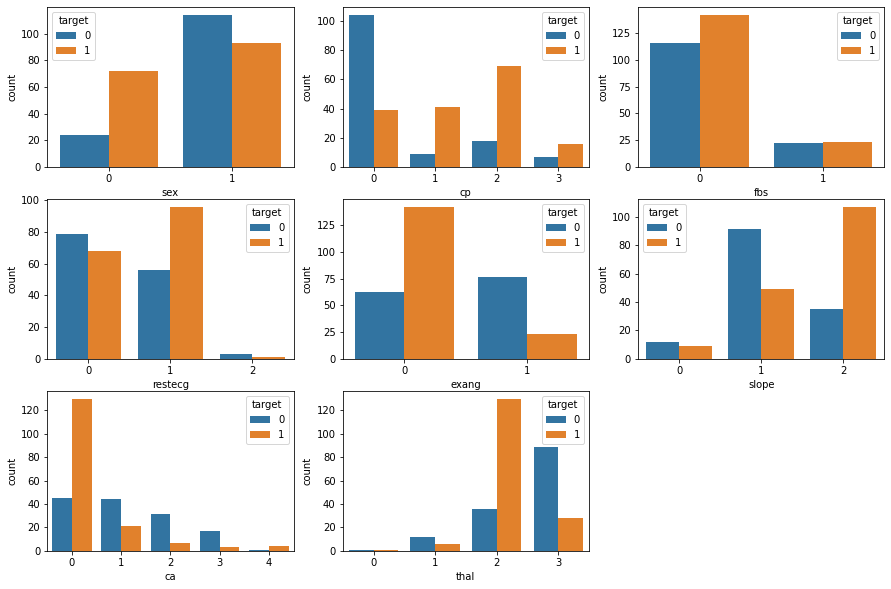

In [16]:
list = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
m=1
plt.figure(figsize=(15,10))
for i in list:
    plt.subplot(3,3,m)
    sns.countplot(x=i,data=df,hue='target')
    m+=1

<AxesSubplot:xlabel='sex', ylabel='count'>

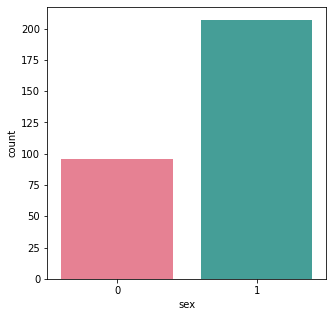

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=df, palette='husl')

<AxesSubplot:xlabel='fbs', ylabel='count'>

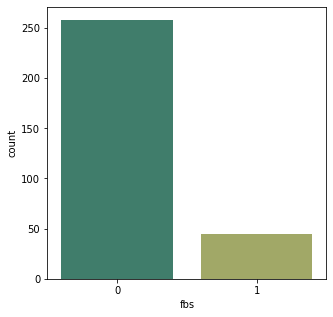

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(x='fbs',data=df, palette='gist_earth')

<AxesSubplot:xlabel='target', ylabel='count'>

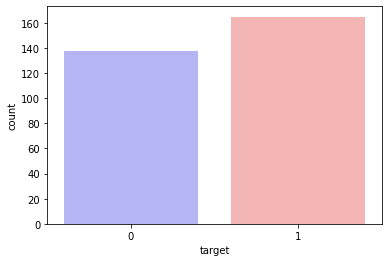

In [19]:
sns.countplot(x="target", data=df, palette="bwr")

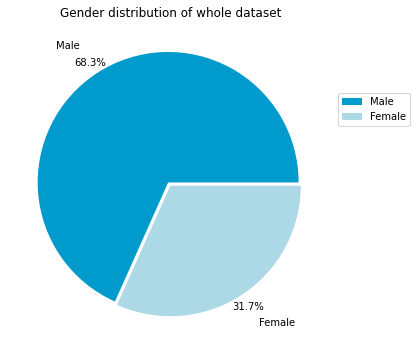

In [20]:
# Gender distribution
fig = plt.figure(figsize=(12,6))
plt.pie(x=df['sex'].value_counts(), labels=["Male","Female"], autopct='%1.1f%%', startangle=0, pctdistance=1.1,
        colors=['#009ACD', '#ADD8E6'],labeldistance=1.25, explode=(0.03,0))
plt.title("Gender distribution of whole dataset")
plt.legend(bbox_to_anchor=(1,0.8))

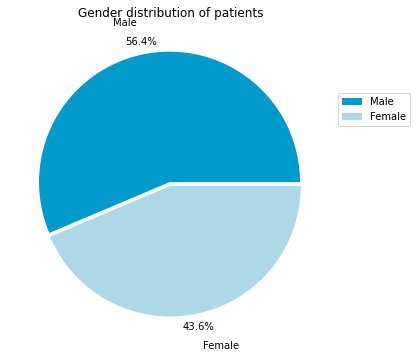

In [21]:
fig = plt.figure(figsize=(12,6))
plt.pie(x=[len(df[(df['sex']==1)&(df['target']==1)]),len(df[(df['sex']==0)&(df['target']==1)])], labels=["Male","Female"], 
        colors=['#009ACD', '#ADD8E6'], autopct='%1.1f%%', startangle=0, pctdistance=1.1,labeldistance=1.25, explode=(0.03,0))
plt.title("Gender distribution of patients")
plt.legend(bbox_to_anchor=(1,0.8))
plt.show()

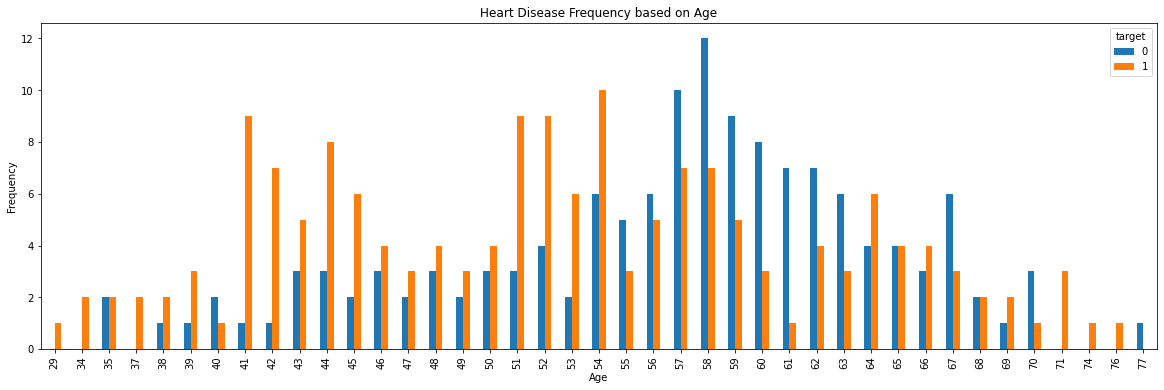

In [22]:
# Heart Disease Frequency based on Age
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency based on Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# 0- No heart defect
# 1-heart defect

In [23]:
# graph for different age groups
# Variance of getting heart for a group disease

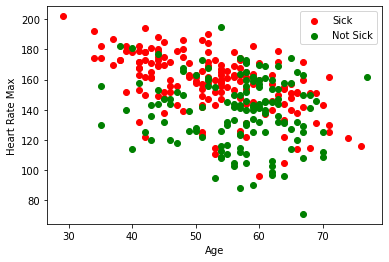

In [24]:
# Scatter Plot based on Age 
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="green")
plt.legend(["Sick", "Not Sick"])
plt.xlabel("Age")
plt.ylabel("Heart Rate Max")
plt.show()

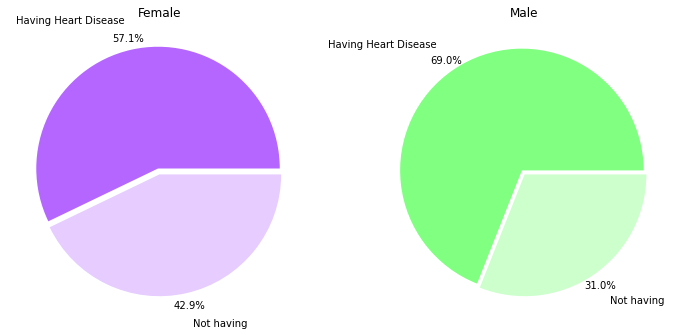

In [25]:
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.pie(x=[96,72], labels=["Having Heart Disease","Not having"], colors=['#b566ff', '#e6ccff'], 
        autopct='%1.1f%%', startangle=0, pctdistance=1.1,labeldistance=1.25, explode=(0.05,0))
plt.title("Female")

plt.subplot(122)
plt.pie(x=[207,93], labels=["Having Heart Disease", "Not having"], colors=['#80ff80', '#ccffcc'], 
        autopct='%1.1f%%', startangle=0, pctdistance=1.1,labeldistance=1.25, explode=(0.04,0))
plt.title("Male")

plt.show()

#### Interpretation

Men are more prone to heart attack

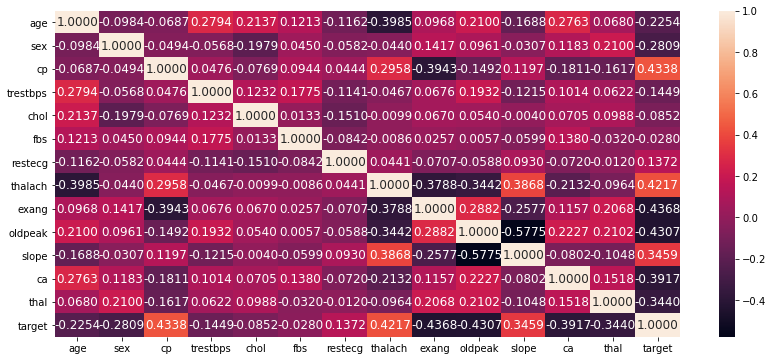

In [26]:
plt.subplots(figsize=(14, 6))
ax = sns.heatmap(df.corr(), annot=True,fmt='.4f',annot_kws={'size':'12'})

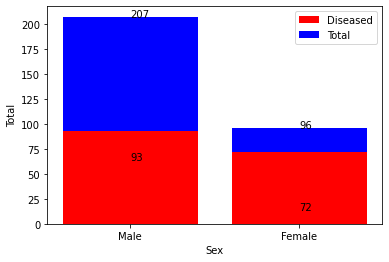

In [27]:
xa=['Male','Female']
ya1=df['sex'].value_counts().tolist()
v1=len(df[(df['target']==1)&(df['sex']==1)])
v2=len(df[(df['target']==1)&(df['sex']==0)])
ya2=[v1,v2]

ya1[0]=ya1[0]-v1
ya1[1]=ya1[1]-v2

plt.bar(xa, ya2,color='r')
plt.bar(xa, ya1,bottom=ya2,color='b')
plt.xlabel("Sex")
plt.ylabel("Total")
plt.legend(['Diseased','Total'])


plt.text(1,ya1[1]+v2,ya1[1]+v2)
plt.text(1,ya1[1]-10,v2)
plt.text(0,ya1[0]-50,v1)
plt.text(0,ya1[0]+v1,ya1[0]+v1)

plt.show()


In [28]:
# Fbs vs age bar graph where fbs=1

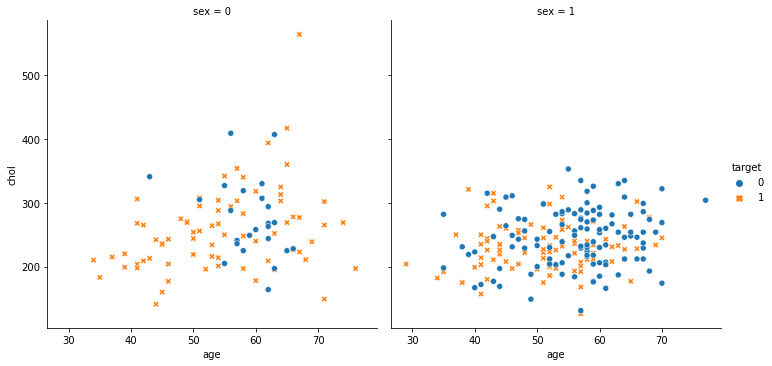

In [29]:
sns.relplot(data=df,x='age',y='chol',hue='target',style='target',col='sex')

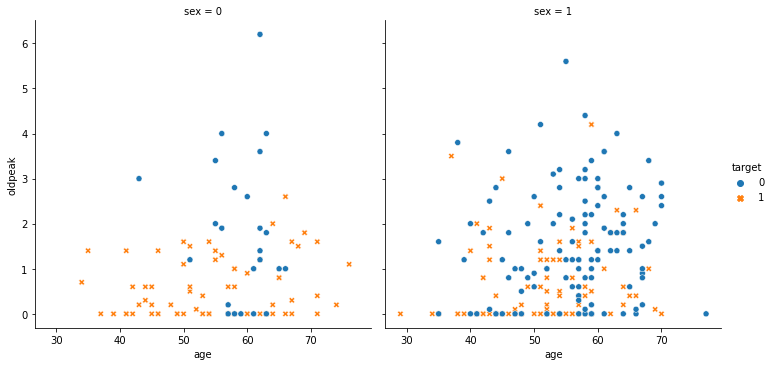

In [30]:
sns.relplot(data=df,x='age',y='oldpeak',hue='target',style='target',col='sex')

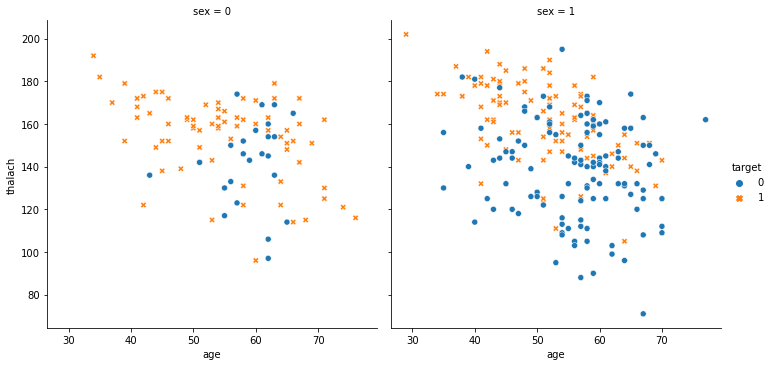

In [31]:
sns.relplot(data=df,x='age',y='thalach',hue='target',style='target',col='sex')

<AxesSubplot:ylabel='Count'>

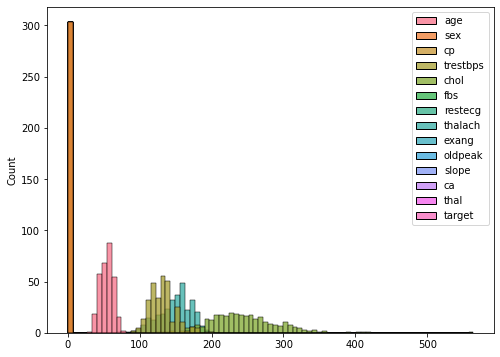

In [32]:
plt.subplots(figsize=(8, 6))
sns.histplot(df)

### Spliting the data

In [33]:
X=df.drop(columns='target',axis=1)
Y=df['target']

In [34]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [35]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [36]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [37]:
print(X.shape, X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


### Logistic Regression Model

In [38]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

### Logistic Regression Model Evaluation

In [39]:
lg_X_train_prediction=model.predict(X_train)
lg_training_data_accuracy=accuracy_score(lg_X_train_prediction,Y_train)
lg_training_data_accuracy

0.8553719008264463

In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(lg_X_train_prediction,Y_train)
print(cm)

[[ 85  10]
 [ 25 122]]


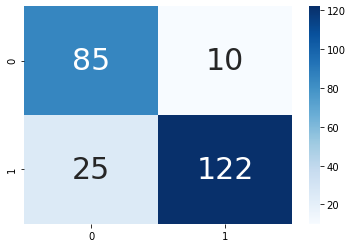

In [41]:
ax=plt.axes()
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',ax=ax,annot_kws={'size':30})
plt.show()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(lg_X_train_prediction,Y_train))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        95
           1       0.92      0.83      0.87       147

    accuracy                           0.86       242
   macro avg       0.85      0.86      0.85       242
weighted avg       0.86      0.86      0.86       242



In [43]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_train,Y_train,cv=5)
scores

array([0.81632653, 0.89795918, 0.72916667, 0.89583333, 0.72916667])

In [44]:
scores.mean()

0.8136904761904763

In [45]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
test_data_accuracy

0.8032786885245902

### Prediction

In [46]:
input_data=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)

# Conveting to numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

In [47]:
if prediction[0]==0:
    print("Healthy")
else:
    print("Has heart defect")

Has heart defect


### SVM Model

In [48]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(X_train,Y_train)

SVC()

### SVM Model evaluation

In [49]:
X_train_prediction=svm_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

0.6942148760330579

In [50]:
X_test_prediction=svm_model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
test_data_accuracy

0.6229508196721312

### Gausian naive bayes Model

In [51]:
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()
gnb_model.fit(X_train,Y_train)

GaussianNB()

### Gausian naive bayes model evaluation

In [52]:
X_train_prediction=gnb_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

0.8471074380165289

In [53]:
X_test_prediction=gnb_model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
test_data_accuracy

0.819672131147541

### Decision tree Model

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtc_model=DecisionTreeClassifier()
dtc_model.fit(X_train,Y_train)

DecisionTreeClassifier()

### Decision tree model evaluation

In [55]:
X_train_prediction=dtc_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

1.0

In [56]:
X_test_prediction=dtc_model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
test_data_accuracy

0.7868852459016393

In [57]:
models=['Logistic Regression','SVM','Gaussian naive bayes','Decision tree']

### Minmax scaler

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm_model.fit(X_train_scaled, Y_train)

SVC()

In [59]:
X_train_prediction=svm_model.predict(X_train_scaled)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

0.8842975206611571

In [60]:
X_test_prediction=svm_model.predict(X_test_scaled)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
test_data_accuracy

0.7704918032786885

### Standard scaler

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm_model.fit(X_train_scaled, Y_train)

SVC()

In [62]:
X_train_prediction=svm_model.predict(X_train_scaled)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

0.9132231404958677

In [63]:
X_test_prediction=svm_model.predict(X_test_scaled)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
test_data_accuracy

0.8032786885245902

### Robust scaling

In [64]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm_model.fit(X_train_scaled, Y_train)

SVC()

In [65]:
X_train_prediction=svm_model.predict(X_train_scaled)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

0.9173553719008265

In [66]:
X_test_prediction=svm_model.predict(X_test_scaled)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
test_data_accuracy

0.7868852459016393

### Normalizer

In [67]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm_model.fit(X_train_scaled, Y_train)

SVC()

In [68]:
X_train_prediction=svm_model.predict(X_train_scaled)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

0.6528925619834711

In [69]:
X_test_prediction=svm_model.predict(X_test_scaled)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
test_data_accuracy

0.6557377049180327

### Parameter tuning

In [70]:
svm_model=SVC(kernel = 'linear')
svm_model.fit(X_train,Y_train)

SVC(kernel='linear')

In [71]:
X_train_prediction=svm_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

0.8553719008264463

In [72]:
svm_model=SVC(kernel = 'rbf')
svm_model.fit(X_train,Y_train)

SVC()

In [73]:
X_train_prediction=svm_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

0.6942148760330579

In [74]:
svm_model=SVC(kernel = 'poly')
svm_model.fit(X_train,Y_train)
X_train_prediction=svm_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

0.7066115702479339

In [75]:
svm_model=SVC(kernel = 'linear', C=4)
svm_model.fit(X_train,Y_train)
X_train_prediction=svm_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

0.8677685950413223

In [76]:
X_test_prediction=svm_model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
test_data_accuracy

0.819672131147541

In [77]:
svm_model=SVC(kernel = 'linear', C=4, gamma=1)
svm_model.fit(X_train,Y_train)
X_train_prediction=svm_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

0.8677685950413223

### SVM model training data accuracy

In [78]:
svm_model=SVC(kernel = 'linear', C=4, gamma=10)
svm_model.fit(X_train,Y_train)
X_train_prediction=svm_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

0.8677685950413223

### SVM model testing data accuracy

In [79]:
X_test_prediction=svm_model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
test_data_accuracy

0.819672131147541

In [80]:
svm_model=SVC(kernel = 'rbf',C=5, gamma=0.01)
svm_model.fit(X_train,Y_train)
X_train_prediction=svm_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

1.0

In [81]:
svm_model=SVC(kernel = 'linear', C=1, gamma=1000)
svm_model.fit(X_train_scaled,Y_train)
X_train_prediction=svm_model.predict(X_train_scaled)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

0.6115702479338843

In [82]:
for i in range(1, 11):
    for j in range(1,11):
        svm_model=SVC(kernel = 'linear', C=i, gamma=j)
        svm_model.fit(X_train,Y_train)
        X_train_prediction=svm_model.predict(X_train)
        training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
        X_test_prediction=svm_model.predict(X_test)
        test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
        if training_data_accuracy>=0.8677685950413223 and test_data_accuracy>0.819672131147541:
            print("i is "+str(i)+" j is "+str(j)+ " test_data_accuracy is "+str(test_data_accuracy))